# ECSE415 - Intro to Computer Vision
## Tutorial 4 - Feature Detection in OpenCV

## Histograms
- Image histograms refers to a histogram of the pixel intensity values of an image.
- A graph showing the number of pixels in an image at each different intensity value.
- For 8-bit grayscale there are 256 different possible intensities, thus the histogram will display the distribution of pixels amongst these values.
- Histograms of RGB images can be shown as either individual histograms of red, green and blue channels.
- Or a 3-D histogram with the three axes representing red, blue and green.

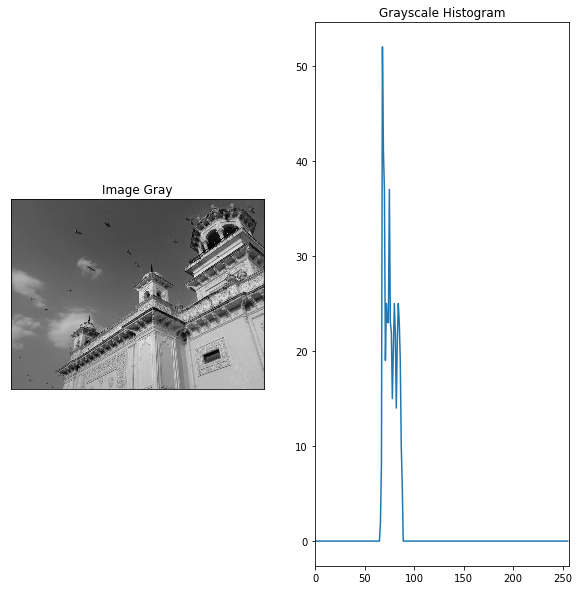

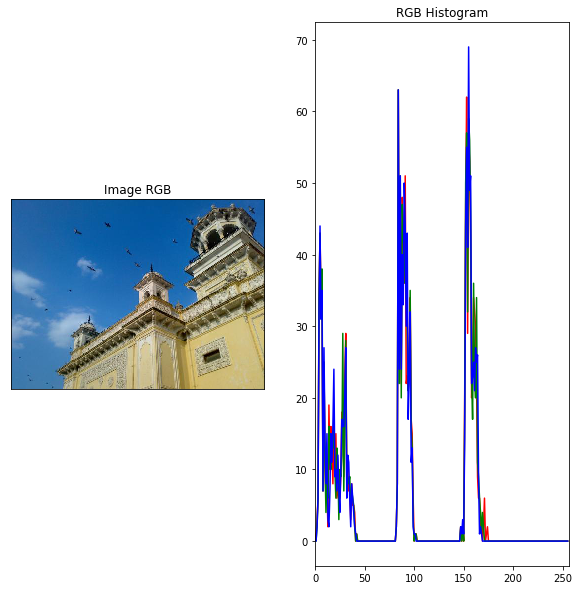

In [1]:
####################
# IMAGE HISTOGRAMS #
####################
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load the image
img = cv2.imread("/home/gary/opencv/samples/data/home.jpg")
# img = cv2.imread("/home/gary/opencv/samples/data/baboon.jpg")
# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# compute histogram for grayscale image
# cv2.calcHist(image, channels, mask, histSize, ranges)
hist_gray = cv2.calcHist(img_gray, [0], None, [256], [0,256])

# compute histogram for each RGB channel
hist_color = []
for i in range(0, img.shape[2]):
    hist_color.append(cv2.calcHist(img, [i], None, [256], [0,256]))

# convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display image
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img_gray, cmap="gray")
plt.title("Image Gray"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist_gray)
plt.title("Grayscale Histogram"), plt.xlim([0, 256])
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img)
plt.title("Image RGB"), plt.xticks([]), plt.yticks([])
plt.subplot(122)
colors = ['r', 'g', 'b']
for i in range(0, img.shape[2]):
    plt.plot(hist_color[i], color=colors[i])
plt.title("RGB Histogram"), plt.xlim([0,256])
plt.show()

## Template Matching
- A technique used in computer vision for finding a sub-image of a target image which matches a template image.
- Technique is used widely in object detection such as,
- Manufacturing (as a part of quality control),
- Robotics (a way to navigate)
- Medical imaging (finding abnormalities),
- Or as a way to detect edges in images.

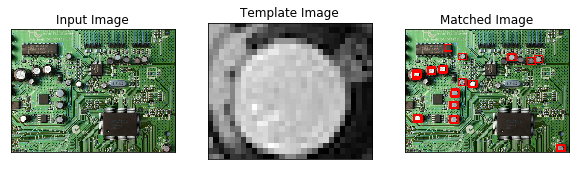

In [8]:
#####################
# TEMPLATE MATCHING #
#####################

# load image
img = cv2.imread("/home/gary/opencv/samples/data/board.jpg")
# create copy
img_disp = img.copy()
# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# create a template from one of the capacitors
temp = img_gray[285:310, 175:205].copy()
ht, wt = temp.shape[0:2]

# apply template matching
res = cv2.matchTemplate(img_gray, temp, cv2.TM_CCOEFF_NORMED)

# set a threshold
thres = 0.6
# find all points above threshold
loc = np.where(res >= thres)
# loop though the points
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_disp, pt, (pt[0]+wt, pt[1]+ht), (255,0,0), 2)

# display images
plt.figure(figsize=(10,10))
plt.subplot(131), plt.imshow(img)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(temp, cmap="gray")
plt.title("Template Image"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_disp)
plt.title("Matched Image"), plt.xticks([]), plt.yticks([])
plt.show()

## Detour on Zip

In [8]:
#######
# ZIP #
#######
x=[1,2,3,7]
y=[4,5,6,9]
for pt in zip(x,y):
    print(pt)

(1, 4)
(2, 5)
(3, 6)
(7, 9)


## Feature Detection and Description

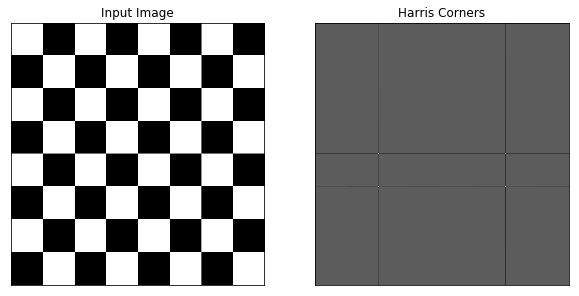

In [3]:
##########################
# HARRIS CORNER DETECTOR #
##########################

# load image as grayscale
img = cv2.imread("/home/gary/opencv/samples/data/chessboard.png")
# copy image
img_disp = img.copy()
# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# detect harris corners
# cv2.cornerHarris(src, neighborhoodsize, sobelKernelSize, Harris_k)
corners = cv2.cornerHarris(img_gray, 2, 3, 0.04)
# normalize corner map [0,1]
cv2.normalize(corners, corners, 0, 1, cv2.NORM_MINMAX)

# threshold for an optimal value
thres = 0.6
# list all points higher than threshold
loc = np.where(corners >= thres)
# loop though points
for pt in zip(*loc[::-1]):
    # draw filled circle on each point
    cv2.circle(img_disp, pt, 50, (255,0,0), -1)

# display images
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_disp)
plt.title("Harris Corners"), plt.xticks([]), plt.yticks([])
plt.show()

## SIFT Features and Descriptors

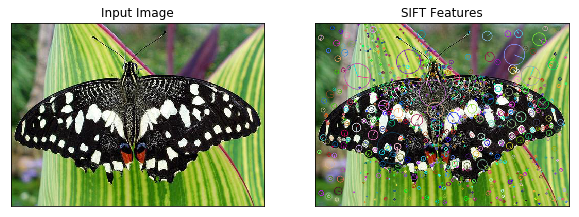

Num keypoints: 1115


In [14]:
#########################
# SIFT FEATURE DETECTOR #
#########################

# load image 
img = cv2.imread("/home/gary/opencv/samples/data/butterfly.jpg")
# copy image
img_disp = img.copy()

# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# detect SIFT features, with no masks
keypoints = sift.detect(img, None)

# draw the keypoints
cv2.drawKeypoints(img, keypoints, img_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_disp = cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB)

# display
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_disp)
plt.title("SIFT Features"), plt.xticks([]), plt.yticks([])
plt.show()

# num of SIFT keypoints
print('Num keypoints: '+ str(len(keypoints)))

descriptors size: (1115, 128)


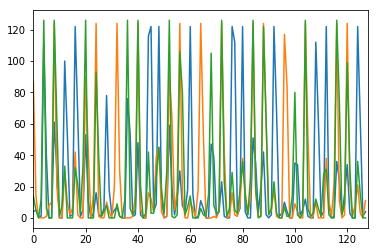

In [17]:
####################
# SIFT DESCRIPTORS #
####################

# load image 
img = cv2.imread("/home/gary/opencv/samples/data/butterfly.jpg")

# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# detect SIFT features, with no masks
keypoints = sift.detect(img, None)

# compute SIFT descriptors
keypoints, descriptors = sift.compute(img, keypoints)

# Alternatively, we can use keypoints,descriptors = sift.detectAndCompute(gray,None) to get both

# num of SIFT keypoints/descriptors
print('descriptors size: '+ str(descriptors.shape))

# plot a couple of 1x128 SIFT descriptors
num = 3
for i in range(num):
    # plot the 256x1 np array using matplotlib plot()
    plt.plot(descriptors[i])
    plt.xlim([0,128]) # set x-axis limit
plt.show()

## SURF Features

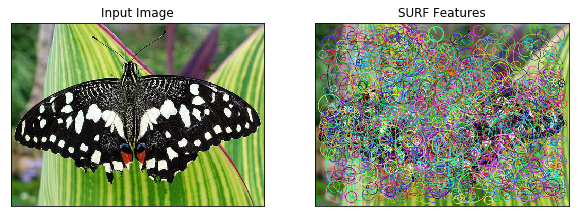

Num keypoints: 1931


In [7]:
#########################
# SURF FEATURE DETECTOR #
#########################

# load image
img = cv2.imread("/home/gary/opencv/samples/data/butterfly.jpg")
# copy image
img_disp = img.copy()
# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# create SURF object
surf = cv2.xfeatures2d.SURF_create()

# detect SURF features
keypoints = surf.detect(img_gray, None)

# draw keypoints
cv2.drawKeypoints(img, keypoints, img_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_disp = cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB)

# display images
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_disp)
plt.title("SURF Features"), plt.xticks([]), plt.yticks([])
plt.show()

# number of SURF keypoints
print("Num keypoints: " + str(len(keypoints)))


## Feature Matching

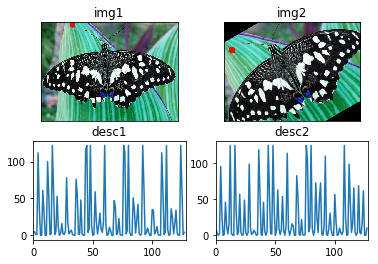

In [8]:
####################
# FEATURE MATCHING #
####################

# load the image 
img1 = cv2.imread("/home/gary/opencv/samples/data/butterfly.jpg")
height, width = img1.shape[0:2] # image size

# Create a rotated, scaled duplicate
# rotation marix around the center pixel, 30 degrees,scale of 1.2
M = cv2.getRotationMatrix2D((width/2,height/2),30,1.2)
# Apply the transformation matrix
img2 = cv2.warpAffine(img1,M,(width,height))

# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Compute the keypoints/descriptors
keypoints1,descriptors1 = sift.detectAndCompute(img1,None)
keypoints2,descriptors2 = sift.detectAndCompute(img2,None)

# Matching
# use cv2.BFMatcher for the assignment
# we will try to match a randomly-selected feature from img1 to img2
idx = 0
# Loop through all descriptors in img2 to find the closest match
bestMatch_idx = -1
bestMatch_dist = float('inf')
for i in range(descriptors2.shape[0]):
    dist = cv2.norm(descriptors1[idx],descriptors2[i],cv2.NORM_L2)
    if dist < bestMatch_dist:
        bestMatch_dist = dist
        bestMatch_idx = i
        
# Draw the keypoints
img_disp1 = img1.copy()
img_disp2 = img2.copy()
# draw a filled circle on each point
center1 = (int(keypoints1[idx].pt[0]),int(keypoints1[idx].pt[1]))
center2 = (int(keypoints2[bestMatch_idx].pt[0]),int(keypoints2[bestMatch_idx].pt[1]))
cv2.circle(img_disp1, center1, 10, (255,0,0), -1)
cv2.circle(img_disp2, center2, 12, (255,0,0), -1)

# Display
plt.subplot(221),plt.imshow(img_disp1),plt.title('img1')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img_disp2),plt.title('img2')
plt.xticks([]), plt.yticks([])

# Plot the descriptors
plt.subplot(223),plt.plot(descriptors1[idx]),plt.title('desc1')
plt.xlim([0,128]) # Set x-axis limit
plt.subplot(224),plt.plot(descriptors2[bestMatch_idx]),plt.title('desc2')
plt.xlim([0,128]) # Set x-axis limit
plt.show() # display all subplots